In [1]:
import pandas as pd
import pandas as pd
import re
import openpyxl
import datetime as dt
import sqlite3
import pyarrow as pa
import pyarrow.parquet as pq
from pathlib import Path
import decimal

import os
import sys
# SRC_DIR = r'/home/pp/program/jupyter/'
sys.path.append(os.path.dirname(r'/home/pp/program/jupyter/'))
from config import *
from dbfread import DBF
# for record in DBF(r'/home/pp/program/jupyter/SHMU/dbobce.dbf', encoding='cp1252', char_decode_errors='strict'):
#      print(str(record))


# dddint(SHMUDIR)

# Replace 'your_file.parquet' with the path to your Parquet file
# df = pd.read_parquet(TEPLOTY_SK_DIR + 'teploty_sk.parquet')
# df



In [2]:
# files = [f"{RES_TEPLOTY_SK_DIR}teploty_sk_{year:04d}-{month:02d}.parquet" for year in [2025] for month in range(7,12)]
def list_parquet_files(directory):
    '''List all parquet files in the given directory'''
    p = Path(directory)
    return sorted([str(f) for f in p.glob('*.parquet')])
files = list_parquet_files(RES_TEPLOTY_SK_DIR)
print(files)
# Read and filter each file, then concatenate
dfs = [pd.read_parquet(f).query("Stanica != 'rezno'") for f in files]
filtered_df = pd.concat(dfs, ignore_index=True)
df = filtered_df
filtered_df.info()
filtered_df.head(20)

['/home/pp/program/jupyter/SHMUSSD/data/teploty_sk/teploty_brezno_2025-07.parquet', '/home/pp/program/jupyter/SHMUSSD/data/teploty_sk/teploty_brezno_2025-08.parquet', '/home/pp/program/jupyter/SHMUSSD/data/teploty_sk/teploty_brezno_2025-09.parquet', '/home/pp/program/jupyter/SHMUSSD/data/teploty_sk/teploty_brezno_2025-10.parquet', '/home/pp/program/jupyter/SHMUSSD/data/teploty_sk/teploty_brezno_2025-11.parquet', '/home/pp/program/jupyter/SHMUSSD/data/teploty_sk/teploty_sk_2025-07.parquet', '/home/pp/program/jupyter/SHMUSSD/data/teploty_sk/teploty_sk_2025-08.parquet', '/home/pp/program/jupyter/SHMUSSD/data/teploty_sk/teploty_sk_2025-09.parquet', '/home/pp/program/jupyter/SHMUSSD/data/teploty_sk/teploty_sk_2025-10.parquet', '/home/pp/program/jupyter/SHMUSSD/data/teploty_sk/teploty_sk_2025-11.parquet']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275705 entries, 0 to 275704
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------

,Stanica,Teplota,Smer,Rýchlosť,Nárazy,Tlak,Oblačnosť,Počasie,Graf,Cas_CET,file
0,Brezno,24.3,Z,2.0,None,1012.6,None,None,NaN,2025-07-30 14:00:00,2025-07-30-15-00
1,Brezno,24.9,JZ,2.0,None,1012.4,None,None,NaN,2025-07-30 15:00:00,2025-07-30-15-10
2,Brezno,24.9,JZ,2.0,None,1012.4,None,None,NaN,2025-07-30 15:00:00,2025-07-30-15-25
3,Brezno,24.9,JZ,2.0,None,1012.4,None,None,NaN,2025-07-30 15:00:00,2025-07-30-15-45
4,Brezno,24.9,JZ,2.0,None,1012.4,None,None,NaN,2025-07-30 15:00:00,2025-07-30-15-30
5,Brezno,24.9,JZ,2.0,None,1012.4,None,None,NaN,2025-07-30 15:00:00,2025-07-30-15-15
6,Brezno,24.9,JZ,2.0,None,1012.4,None,None,NaN,2025-07-30 15:00:00,2025-07-30-15-20
7,Brezno,24.9,Z,3.0,None,1012.4,None,None,NaN,2025-07-30 16:00:00,2025-07-30-16-45
8,Brezno,24.8,Z,2.0,None,1012.2,None,None,NaN,2025-07-30 17:00:00,2025-07-30-17-45
9,Brezno,24.0,Z,3.0,None,1012.3,None,None,NaN,2025-07-30 18:00:00,2025-07-30-18-45


In [5]:

# print(df.head())
# print(df.describe())
# print(tf.info())
# print(df.filter(like=25, axis=0).head(20))
bdf = df[df['Stanica'] == 'Brezno']
# bdf = df[df.index == 8]
bdf.index.unique()

# print(bdf.info())

Index([    73,    260,    329,    488,    566,    660,    667,    767,    861,
          994,
       ...
       271945, 272129, 272175, 272322, 272421, 272442, 272601, 272701, 272793,
       272864],
      dtype='int64', length=2775)

In [6]:
bdf.loc[:,['Teplota','Tlak']].agg(['min', 'max', 'mean', 'std', 'count'])


,Teplota,Tlak
min,-6.900000,991.800000
max,34.200000,1031.400000
mean,11.438883,1018.001803
std,7.879681,6.136422
count,2775.000000,2773.000000


<Axes: title={'center': 'Brezno - Teplota a Tlak (1961-2023)'}, xlabel='Teplota', ylabel='Tlak'>

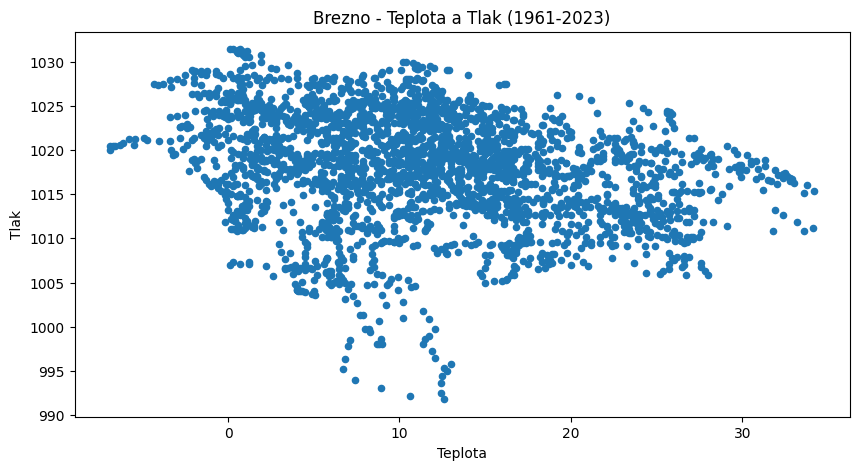

In [7]:
bdf.loc[:,['Teplota','Tlak']].plot(kind='scatter', x='Teplota', y='Tlak', figsize=(10,5), title='Brezno - Teplota a Tlak (1961-2023)')

In [8]:
result = bdf.set_index(bdf.Cas_CET).resample('D').agg({'Teplota':['min', 'max', 'mean'], 'Tlak':['mean']})  
# bdf.groupby(bdf.index).agg({'Teplota':['min', 'max', 'mean', 'std', 'count'], 'Tlak':['min', 'max', 'mean', 'std', 'count']}).plot(kind='line', y=('Teplota','mean'), figsize=(10,5), title='Brezno - Teplota (1961-2023)')    
result.to_excel(TEPLOTY_SK_DIR + 'teploty_brezno_den.xlsx')
# result.in
